# Business Understanding

Airbnb stands for “Air Bed and Breakfast,” and is a service started in 2008 by Brian Chesky and Joe Gebbia. It is motivated by the fact that not every traveler can afford to stay in a hotel or find a hotel room specially in a busy, urban area. Therefore, Airbnb is supposed to provide the travellers with a simple and less expensive alternative options. It is a peer-to-peer business model letting property owners rent out their spaces to travelers and travelers rent a space for multiple people to share or rent the entire property for themselves. Consequently, Airbnb makes it simple and more profitable for both parties. 

In this project, analyzing [Seattle dataset](https://www.kaggle.com/datasets/airbnb/seattle), we are interested in answering the following questions:
1. How much Airbnb homes are earning in certain time frames and areas?
    - What are the areas with the highest and lowest prices?
2. What are the properties helping to predict price?
3. Can we find the lisings with positive and negative reviews?
    - what are the characteristics of the positive and negative listings.
    
For this analysis, we particularly use the following datasets:
 - **calendar.csv** which consists of listing ids, availability and the price for the day 
 - **listings.csv** which consists of informtion like the descriptions, property types and review scores
 - **reviews.csv** which consists of id, and name for each reviewer along with the provided comment


# Data Understanding

In this part, we gather, explore, clean, and analyze the data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from IPython import display
%matplotlib inline

### Importing the data and obtaining the sizes of the tables

In [2]:
df_calendar_seattle=pd.read_csv('./archive_seatle/calendar.csv')
df_listing_seattle=pd.read_csv('./archive_seatle/listings.csv')
df_reviews_seattle=pd.read_csv('./archive_seatle/reviews.csv')

print("size of df_listing_seattle : ", df_listing_seattle.shape)
print()
print("size of df_calendar_seattle : ", df_calendar_seattle.shape)
print()
print("size of df_reviews_seattle : ", df_reviews_seattle.shape)

size of df_listing_seattle :  (3818, 92)

size of df_calendar_seattle :  (1393570, 4)

size of df_reviews_seattle :  (84849, 6)


#### Understanding listings.csv

In [3]:
print("listings.csv has {} rows and {} columns".format(df_listing_seattle.shape[0], df_listing_seattle.shape[1]))

listings.csv has 3818 rows and 92 columns


In [4]:
# Understanding the head of listings.csv
df_listing_seattle.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
df_listing_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [6]:
# Finding quantitative columns for listings.csv
num_vars_listing_seattle = df_listing_seattle.select_dtypes(include=['float', 'int']).columns
print(len(num_vars_listing_seattle))
num_vars_listing_seattle

30


Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'guests_included',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')

In [7]:
# Finding categorical columns for listings.csv
cat_vars_listing_seattle = df_listing_seattle.select_dtypes(include=['object']).columns
print(len(cat_vars_listing_seattle))
cat_vars_listing_seattle

62


Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'extra_people', 'calendar_updated', 'has_availability',
       'calendar_last_s

#### Understanding calendar.csv

In [8]:
print("calendar.csv has {} rows and {} columns".format(df_calendar_seattle.shape[0], df_calendar_seattle.shape[1]))

calendar.csv has 1393570 rows and 4 columns


In [9]:
# Understanding the head of calendar.csv
df_calendar_seattle.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [10]:
df_calendar_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


#### Understanding reviews.csv

In [11]:
print("reviews.csv has {} rows and {} columns".format(df_reviews_seattle.shape[0], df_reviews_seattle.shape[1]))

reviews.csv has 84849 rows and 6 columns


In [12]:
# Understanding df_reviews_seattle head
df_reviews_seattle.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [13]:
df_reviews_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


# Data Preparation
In this part, we clean, analyze, and visualize the data. 

In [14]:
# finding columns with a lot of NaN values
seattle_listing_most_missing_cols = list(df_listing_seattle.columns[df_listing_seattle.isnull().mean() > 0.75])
seattle_listing_most_missing_cols

['square_feet', 'license']

In [15]:
# droping columns with a lot of NaN values
df_listing_seattle.drop(seattle_listing_most_missing_cols, inplace = True, axis = 1)
df_listing_seattle.shape

(3818, 90)

Now, we visualize the histograms of the property type, availabilities, reviews, and room types.

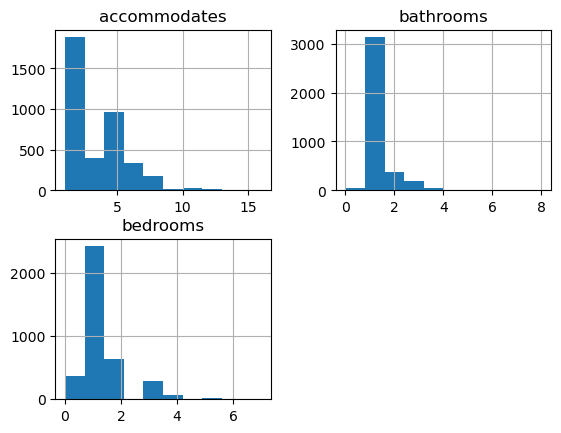

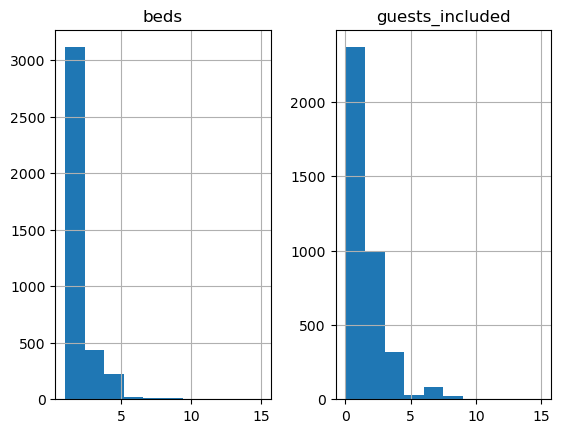

In [16]:
# Number of people accommodating, bathrooms, bedrooms, beds, and guests_included
df_listing_seattle[['accommodates', 'bathrooms', 'bedrooms']].hist();
df_listing_seattle[['beds', 'guests_included']].hist();

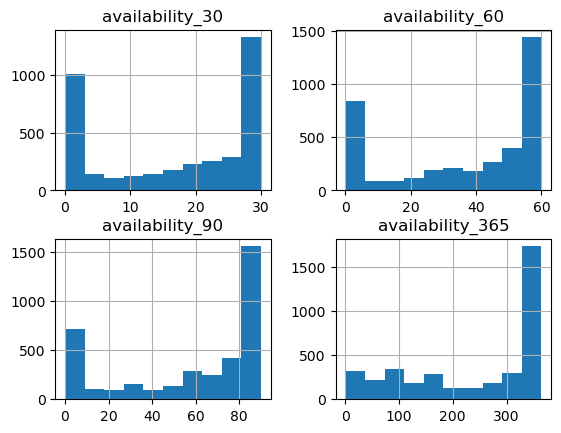

In [17]:
df_listing_seattle[['availability_30', 'availability_60','availability_90', 'availability_365']].hist();

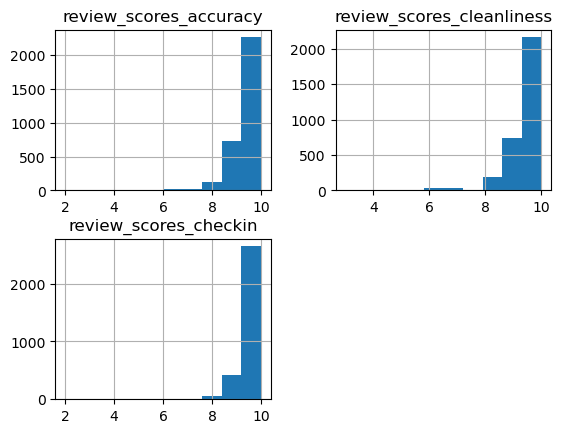

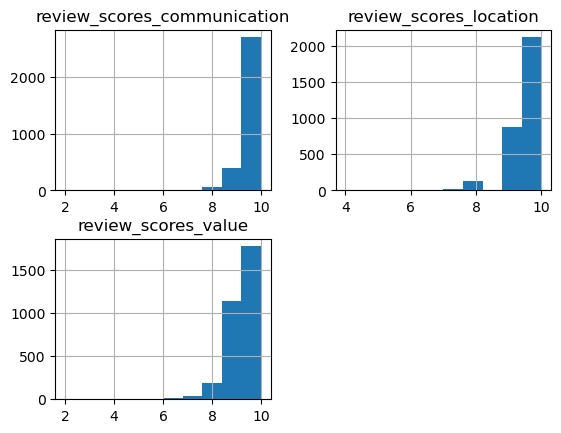

In [18]:
# reviews histograms
df_listing_seattle[['review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin']].hist();
df_listing_seattle[['review_scores_communication', 'review_scores_location',
       'review_scores_value']].hist();

In [19]:
# number of unique property_type 
df_listing_seattle['property_type'].nunique()

16

In [20]:
# property_type statistics
df_listing_seattle['property_type'].describe()

count      3817
unique       16
top       House
freq       1733
Name: property_type, dtype: object

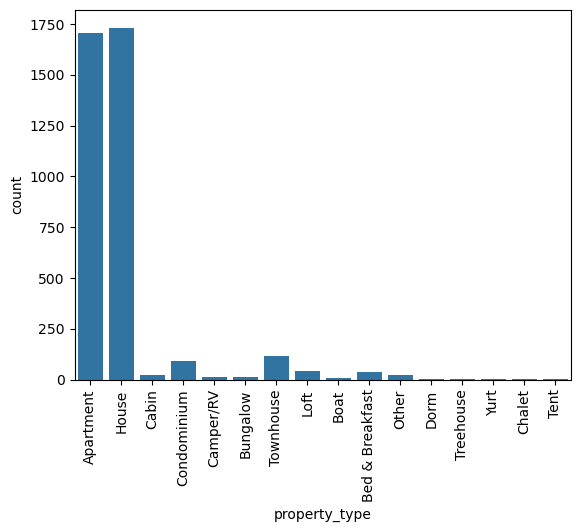

In [21]:
base_color = sb.color_palette()[0];
sb.countplot(data=df_listing_seattle, x='property_type', color=base_color);

plt.xticks(rotation=90);

In [22]:
# number of unique property_type 
df_listing_seattle['room_type'].nunique()

3

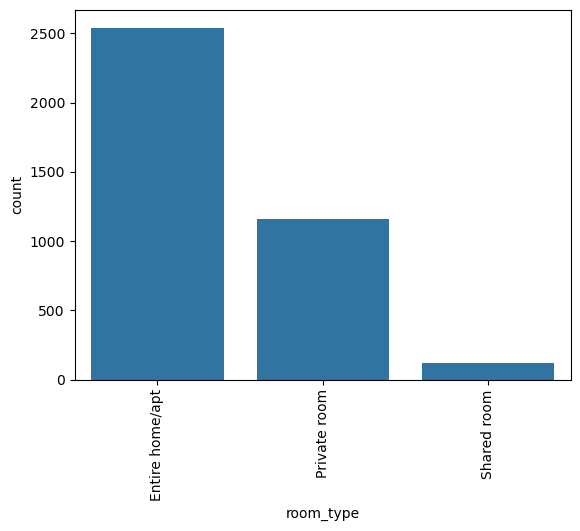

In [23]:
base_color = sb.color_palette()[0];
sb.countplot(data=df_listing_seattle, x='room_type', color=base_color);

plt.xticks(rotation=90);

In [24]:
# number of non-null neighbourhoods
df_listing_seattle['neighbourhood'].isnull().sum()

416

#### We drop the NaN prices if there is any

In [25]:
# fraction of NaN prices in listing table
df_listing_seattle['price'].isnull().mean()

0.0

In [26]:
# fraction of NaN prices in calendar table
df_calendar_seattle['price'].isnull().mean()

0.32938998399793334

In [27]:
# Dropping the NaN prices
df_calendar_seattle = df_calendar_seattle.dropna(subset=['price'], how='any')
df_calendar_seattle['price'].isnull().mean()

0.0

#### We need to convert the string format of the price column to float.

In [28]:
# Converting the price column to float
df_listing_seattle['price'] = df_listing_seattle['price'].apply(lambda x: float(x.replace("$", '').replace(",", '')))

In [29]:
# Converting the price column to float
df_calendar_seattle['price'] = df_calendar_seattle['price'].apply(lambda x: float(x.replace("$", '').replace(",", '')))

In [30]:
# Getting the fraction of NaN value neighbourhoods
df_listing_seattle['neighbourhood'].isnull().mean()

0.10895756940806706

In [31]:
# Dropping the NaN neighbourhoods
df_listing_seattle = df_listing_seattle.dropna(subset=['neighbourhood'], how='any')
df_listing_seattle['neighbourhood'].isnull().mean()

0.0

In [32]:
# Getting the unique neighbourhoods
df_listing_seattle['neighbourhood'].unique()

array(['Queen Anne', 'Ballard', 'Phinney Ridge', 'Fremont',
       'Lower Queen Anne', 'Westlake', 'Wallingford', 'Green Lake',
       'Minor', 'Madrona', 'Harrison/Denny-Blaine', 'Leschi',
       'University District', 'Roosevelt', 'Madison Park', 'Capitol Hill',
       'Atlantic', 'North Beacon Hill', 'Central Business District',
       'Pike Place Market', 'Pike Market', 'Eastlake', 'Portage Bay',
       'South Lake Union', 'Magnolia', 'Belltown',
       'International District', 'Yesler Terrace', 'First Hill',
       'Pioneer Square', 'Gatewood', 'The Junction', 'Arbor Heights',
       'Alki', 'North Admiral', 'Crown Hill', 'Genesee', 'Fairmount Park',
       'Interbay', 'Industrial District', 'Holly Park',
       'South Beacon Hill', 'Greenwood', 'Bitter Lake', 'Fauntleroy',
       'Mount Baker', 'Columbia City', 'Seward Park', 'Brighton',
       'South Delridge', 'Highland Park', 'High Point', 'View Ridge',
       'Windermere', 'Dunlap', 'Rainier Beach', 'North Delridge',
       

In [33]:
# Getting the fraction of NaN comments 
df_reviews_seattle['comments'].isnull().mean()

0.00021214156914047309

In [34]:
# Dropping the NaN comments
df_reviews_seattle = df_reviews_seattle.dropna()
df_reviews_seattle['comments'].isnull().mean()

0.0

# Modeling, Evaluation, and Deployment

In this part, we investigte the following specific questions:
1. How much Airbnb homes are earning in certain areas? Most and least expensive neighbourhoods
2. How much Airbnb homes are earning in certain time frames?
3. What are the properties helping to predict price?
4. Can we find the lisings with positive and negative reviews?

by modeling and evaluating the available data.

### How much Airbnb homes are earning in certain areas? Most and least expensive neighbourhoods

The following analysis shows the neighbourhoods with highest and lowest average prices.

In [35]:
# Generating a sorted list of neighbourhoods in terms of average price pernight from the most expensive to least expensive
df_listing_seattle_groupded_by_neighbourhood = df_listing_seattle.groupby(['neighbourhood']).mean()['price'].sort_values(ascending = False)
df_listing_seattle_groupded_by_neighbourhood

/var/folders/fw/pd0cqcc90wn3x9y5skbdl_fc0000gn/T/ipykernel_85293/2169015751.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_listing_seattle_groupded_by_neighbourhood = df_listing_seattle.groupby(['neighbourhood']).mean()['price'].sort_values(ascending = False)


neighbourhood
Fairmount Park         370.000000
Industrial District    245.000000
Portage Bay            241.428571
Westlake               197.000000
Alki                   196.652174
                          ...    
Georgetown              77.000000
Rainier Beach           76.722222
Dunlap                  75.461538
Olympic Hills           63.666667
Roxhill                 60.000000
Name: price, Length: 81, dtype: float64

The following bar charts show the 10 most expensive and 10 least expensive neighbourhoods

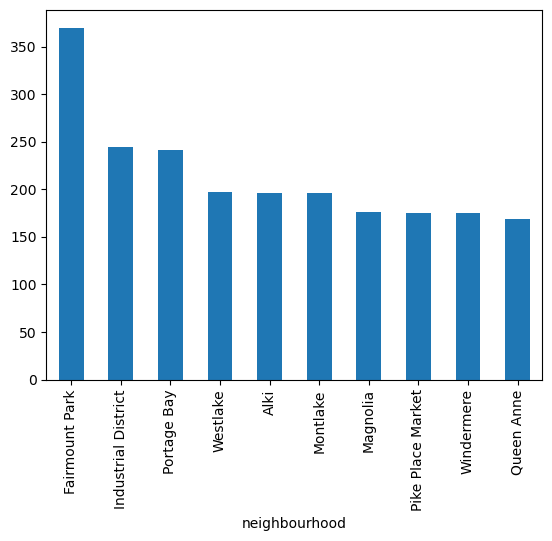

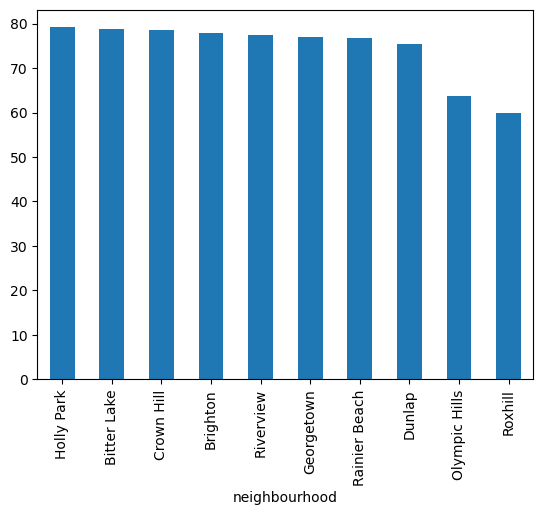

In [36]:
df_listing_seattle_groupded_by_neighbourhood.head(10).plot.bar()

plt.show()

df_listing_seattle_groupded_by_neighbourhood.tail(10).plot.bar()

plt.show()

The above charts show that the most expensive neighbourhood is Fairmount Park and the cheapest neighbourhood is Roxhill.

### How much Airbnb homes are earning in certain time frames?
We first create a data frame grouping listing ids based on date.

In [37]:
df_calendar_seattle_groupded_by_date = df_calendar_seattle.groupby('date')
df_calendar_seattle_groupded_by_date.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
9,241032,2016-01-13,t,85.0
10,241032,2016-01-14,t,85.0
14,241032,2016-01-18,t,85.0
...,...,...,...,...
4753,8889257,2016-01-12,t,98.0
5113,5680462,2016-01-07,t,399.0
5114,5680462,2016-01-08,t,399.0
5128,5680462,2016-01-22,t,549.0


In [38]:
from datetime import date, timedelta

def daterange(start_date, end_date):
    '''
    INPUT
    start_date - python date object 
    end_date - python date object
    
    This function generates all the dates between the start_date and the end_date day after day
    '''
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

# start_date = date(2013, 1, 1)
# end_date = date(2015, 6, 2)
# for single_date in daterange(start_date, end_date):
#     date_str_format = single_date.strftime("%Y-%m-%d")
#     print(date_str_format)

Given the start_date and the end_date, we compute the revenue obtained for each month in that time frame using the function below. The data contains the prices ONLY for 2016. The bar chart below shows the revenue obtained for each month.

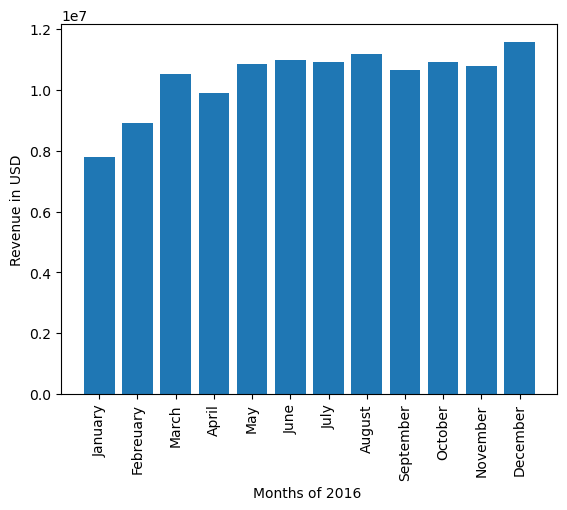

In [39]:
import re

# returns revenue earned by airbnb listing between the start_date to and not including the end_date
def get_airbnb_revenue(start_date, end_date):
    '''
    INPUT
     start_date - start date in string format
     end_date - end date in string format
    
    OUTPUT
    revenue_in_USD - revenue obtained in float
    
    This function computes the revenue obtained between the start_date and the end_date in USD.
    '''
    missing_records = []
    revenue_in_USD = 0
    for single_date in daterange(start_date, end_date):
        date_str_format = single_date.strftime("%Y-%m-%d")
        try:
            df_calendar_date_seattle = df_calendar_seattle_groupded_by_date.get_group(date_str_format)
            for index, row in df_calendar_date_seattle.iterrows():
                price = row['price']
                revenue_in_USD += price
        except:
            missing_records.append(date_str_format)
        finally:
            continue
    if len(missing_records) > 0:
        print("There is no record for these dates : ", missing_records)
    
    return revenue_in_USD

# start_date = date(2013, 1, 4)
# end_date = date(2016, 1, 5)
# print("The total earnings between {} and {} is".format(start_date, end_date), get_airbnb_revenue(start_date, end_date))

# start_date = date(2016, 1, 4)
# end_date = date(2017, 1, 3)
# print("The total earnings between {} and {} is".format(start_date, end_date), get_airbnb_revenue(start_date, end_date))

'''
We create the bar charts for the revenue throughout 2016
'''
revenues_in_USD = []
for i in range(1, 12):
    start_date = date(2016, i, 4)
    end_date = date(2016, i + 1, 3)
    revenues_in_USD.append(get_airbnb_revenue(start_date, end_date))

start_date = date(2016, 12, 4)
end_date = date(2017, 1, 3)
revenues_in_USD.append(get_airbnb_revenue(start_date, end_date))

month_to_revenue_in_USD = {
    'January' : revenues_in_USD[0],
    'Febreuary' : revenues_in_USD[1],
    'March' : revenues_in_USD[2],
    'April' : revenues_in_USD[3],
    'May' : revenues_in_USD[4],
    'June' : revenues_in_USD[5],
    'July' : revenues_in_USD[6],
    'August' : revenues_in_USD[7],
    'September' : revenues_in_USD[8],
    'October' : revenues_in_USD[9],
    'November' : revenues_in_USD[10],
    'December' : revenues_in_USD[11],
}

months = list(month_to_revenue_in_USD.keys())
revenues = list(month_to_revenue_in_USD.values())

plt.bar(range(len(month_to_revenue_in_USD)), revenues, tick_label=months)

plt.xticks(rotation=90);

plt.xlabel("Months of 2016 ")
plt.ylabel("Revenue in USD")

plt.show()

From the bar chart above, we observe that the highest revenue is obtained in the month of Dec of 2016, followed by August, and March.

## What are the properties helping to predict price?
In this section, we try to predict the prices by investigating the appropriate numerical and categorical features and using a simple linear regression model.

In [40]:
# Dummy the categorical variables
# We use the following categorical variables as our caregorical variables and dummy them:
cat_vars = ['neighbourhood', 'property_type', 'room_type', 'bed_type'] #
df_regression_seattle_vars = pd.DataFrame()
df_regression_seattle_vars = df_listing_seattle[cat_vars]
for var in  cat_vars:
    # for each cat add dummy var, drop original column
    df_regression_seattle_vars = pd.concat([df_regression_seattle_vars.drop(var, axis=1), 
                                           pd.get_dummies(df_regression_seattle_vars[var], 
                                                          prefix=var, prefix_sep='_', drop_first=True)], axis=1)
cat_columns = list(df_regression_seattle_vars.columns)

In [41]:
# We furher consider the following columns as our quatitative features
numerical_columns = ['availability_30', 'availability_60', 'availability_90', 'availability_365', 'latitude', 'longitude', 'review_scores_rating', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'minimum_nights',
       'maximum_nights']
df_regression_seattle_vars[numerical_columns] = df_listing_seattle[numerical_columns]

df_regression_seattle_vars['price'] = df_listing_seattle['price']
df_regression_seattle_vars.shape

(3402, 115)

(3402, 13)
(3402, 101)
(3402, 114)


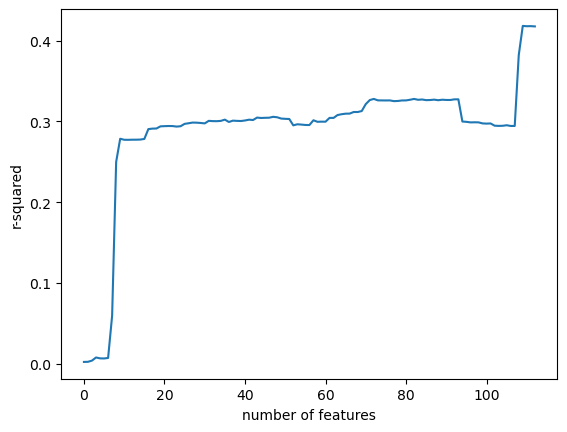

In [42]:
# In order to see the effect of different features we are considering, we include them one by one to a 
# simple linear regression model, and plot the corresponding r-squared as shown below.

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# The following function, takes a dataframe, i.e., df, along with quantitave features numerical_columns, and 
# cetgorical features cat_columns, and dependeing on the scaling flag being true or false, it scales the columns 
# of the input dataframe df.

def preprocessing(df, scaling, cutoff, numerical_columns, cat_columns):
    '''
    INPUT
     df - a data frame
     scaling - a boolean: True means allow scaling, False means skip the scaling
     cutoffs - a list of numbers pertaining to the number of missing values allowed in the used columns
     numerical_columns: list of numerical columns
     cat_columns: list of categorical columns
    
    OUTPUT
     X - Input features
     Y - the independent variable to be predicted
    
    This function preprocesses the input data and outputs the preprocess features along with the independent values.
    '''
    
    # Mean function
    fill_mean = lambda col: col.fillna(col.mean())

    # Fill the mean
    fill_df = df.apply(fill_mean, axis=0)

    y = fill_df['price'].values.tolist()
    X = fill_df.drop('price', axis='columns', inplace=False)

    if scaling:

        from sklearn import preprocessing
        d = preprocessing.normalize(X[numerical_columns], norm='l2')
        scaled_X = pd.DataFrame(d, columns=numerical_columns)
        print(scaled_X.shape)
        print(X[cat_columns].shape)
        scaled_X.reset_index(inplace=True, drop=True)
        X.reset_index(inplace=True, drop=True)


        X_red_cat = X[cat_columns].iloc[:, np.where((X[cat_columns].sum() > cutoff) == True)[0]]

        scaled_X = pd.concat([scaled_X, X_red_cat], axis='columns')
        print(scaled_X.shape)


        scaled_y = list(preprocessing.normalize([np.array(y)]).transpose())
        scaled_y = [item for sublist in pd.DataFrame(scaled_y).values for item in sublist]
        
        return scaled_X, scaled_y
    else:
        return X, y

def RSquared(X_train, X_test, y_train, y_test):
    '''
    INPUT
     X_train - a data frame containing train feature data
     X_test - a data frame containing test feature data
     y_train - a data frame containing train labels
     y_test - a data frame containing test labels
    
    OUTPUT
     r2_list - list of r2-squared
    
    This function takes the training and test data and outputs the list of r2 scores by considering different 
    features incrementally.    
    '''
    
    r2_list = [] 
    for i in range(1,len(X_train.columns)):
        lm_model = LinearRegression() # Instantiate
        lm_model.fit(X_train.iloc[:,:i], y_train) #Fit

        #Predict and score the model
        y_test_preds = lm_model.predict(X_test.iloc[:,:i]) 
        r2= r2_score(y_test, y_test_preds)
        "The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2, len(y_test))
        r2_list.append(r2) 
    return r2_list
    
    
    
X, y = preprocessing(df_regression_seattle_vars, True, 0, numerical_columns, cat_columns)

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

r2_list = RSquared(X_train, X_test, y_train, y_test)  
plt.plot(r2_list)

plt.xlabel("number of features")
plt.ylabel("r-squared")

plt.show()


### Getting the highest prices
The computation below shows that the highest 20 percent of the prices lie between 170 USD and 1000 USD.

In [43]:
percentile = .8
percentile_val = df_regression_seattle_vars['price'].quantile(percentile)
df_regression_seattle_vars_top_prices = df_regression_seattle_vars[df_regression_seattle_vars['price'] >= percentile_val]
print("Min Pice : ", df_regression_seattle_vars_top_prices['price'].min())
print("Max Price : ", df_regression_seattle_vars_top_prices['price'].max())

Min Pice :  170.0
Max Price :  1000.0


### Getting the lowest prices
The computation below shows that the lowest 20 percent of the prices lie between 20 USD and 69 USD.

In [44]:
# The low 20% prices
percentile = .2
percentile_val = df_regression_seattle_vars['price'].quantile(percentile)
df_regression_seattle_vars_low_prices = df_regression_seattle_vars[df_regression_seattle_vars['price'] <= percentile_val]
print("Min Pice : ", df_regression_seattle_vars_low_prices['price'].min())
print("Max Price : ", df_regression_seattle_vars_low_prices['price'].max())


Min Pice :  20.0
Max Price :  69.0


## Can we find the lisings with positive and negative reviews?

In this part, we analyze the sentiment of the collected reviews using [vaderSentiment](https://pypi.org/project/vaderSentiment/#:~:text=VADER%20(Valence%20Aware%20Dictionary%20and,on%20texts%20from%20other%20domains.). Particularly, we label the review comments in the df_reviews_seattle data frame with "Positive", "Negative", and "Neutral", and investigate the corresponding statistics, prices and the property types.

In [45]:
import vaderSentiment
# calling SentimentIntensityAnalyzer object
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

def vader_sentiment_analysis(review_content):
    '''
    INPUT
     review_content - a review comment in string format
    
    OUTPUT
     The sentimet string - "Positive", "Negative" or "Neutral"
    
    This function gets the review_content as an string object, and returns whether it is a 
    positive, negative, or neutral comment.    
    '''
    score_dict = analyser.polarity_scores(review_content)
    compound = score_dict['compound']
    
    def Sentiment(x):
        if x>= 0.05:
            return "Positive"
        elif x<= -0.05:
            return "Negative"
        else:
            return "Neutral"
        
    return Sentiment(compound)

# Example:
review_content = df_reviews_seattle.iloc[0]['comments']
print("Comment : ", review_content)
print("Sentiment : ", vader_sentiment_analysis(review_content))


Comment :  Cute and cozy place. Perfect location to everything! 
Sentiment :  Positive


In [46]:
# Revisiting the df_reviews_seattle head
df_reviews_seattle.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [ ]:
# Labeling the comments column of df_reviews_seattle with the corresponding sentiments, and populating 
# df_reviews_seattle_stat dataframe out of those labels
df_reviews_seattle_stat = pd.DataFrame()
df_reviews_seattle_stat[['listing_id', 'date']] = df_reviews_seattle[['listing_id', 'date']]
df_reviews_seattle_stat['review_sentiment'] = df_reviews_seattle['comments'].apply(vader_sentiment_analysis)

In [ ]:
# Understanding the head of df_reviews_seattle_stat
df_reviews_seattle_stat.head()

The following figure shows the histogram of the sentiments of the review comments. As was expected from the explatory phase of the data set above, the majority of the comments are positive. That is because that we had a skewed rating histogram towards the high scores.

In [ ]:
df_reviews_seattle_stat['review_sentiment'].hist();

In [ ]:
# Summary percebntage of review sentiments
df_reviews_seattle_stat['review_sentiment'].value_counts(normalize=True) * 100

In [ ]:
# List of all negative review listing_ids
negative_review_listing_ids = df_reviews_seattle_stat.loc[df_reviews_seattle_stat['review_sentiment'] == 'Negative']['listing_id'].values.tolist()


In [ ]:
df_listing_seattle[df_listing_seattle['id'].isin(negative_review_listing_ids)]['price']

As the histogram below shows, the majority of negative reviews are for listings with less than 200 USD.

In [ ]:
negative_review_prices = np.array(list(df_listing_seattle[df_listing_seattle['id'].isin(negative_review_listing_ids)]['price']))

fig, ax = plt.subplots(1, 1)
ax.hist(negative_review_prices)
  
# Set title
ax.set_title("Negative Review prices histogram")
ax.set_xlabel('Prices in USD')
ax.set_ylabel('Number of Prices')

plt.show()

The histograms below show the distributions for the negative listings for the property types, room types, and the bed types. As shown below, these distrubtions do not differ from the histograms for the all the listings provied above in the exploratory phase.

In [ ]:

base_color = sb.color_palette()[0];
sb.countplot(data=df_listing_seattle[df_listing_seattle['id'].isin(negative_review_listing_ids)], x='property_type', color=base_color);

plt.xticks(rotation=90);

In [ ]:

base_color = sb.color_palette()[0];
sb.countplot(data=df_listing_seattle[df_listing_seattle['id'].isin(negative_review_listing_ids)], x='room_type', color=base_color);

plt.xticks(rotation=90);

In [ ]:
base_color = sb.color_palette()[0];
sb.countplot(data=df_listing_seattle[df_listing_seattle['id'].isin(negative_review_listing_ids)], x='bed_type', color=base_color);

plt.xticks(rotation=90);

# Conclusion

In conclusion, the most expensive neighbourhood is Fairmount Park and the cheapest neighbourhood is Roxhill. The highest 20 percent of the prices lie between 170 USD and 1000 USD, and the lowest 20 percent of the prices lie between 20 USD and 69 USD. The highest revenue is obtained in the month of Dec of 2016, followed by August, and March.
Furthermmore, the majority of negative reviews are for listings with less than 200 USD.